In [33]:
# importing libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
data.shape

(158, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
# checking for missing values
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#No null values

In [7]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
data.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [9]:
#Dropping the columns Country and Happiness Rank
data = data.drop(columns= ['Country', 'Happiness Rank'])

In [10]:
data

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
# Data Analysis 
#Region is the only categorical data in the dataset
# Dividing categorical and numerical data
c_data= data['Region']


In [12]:
print(c_data.value_counts(normalize=True, dropna=False)*100)

Sub-Saharan Africa                 25.316456
Central and Eastern Europe         18.354430
Latin America and Caribbean        13.924051
Western Europe                     13.291139
Middle East and Northern Africa    12.658228
Southeastern Asia                   5.696203
Southern Asia                       4.430380
Eastern Asia                        3.797468
North America                       1.265823
Australia and New Zealand           1.265823
Name: Region, dtype: float64


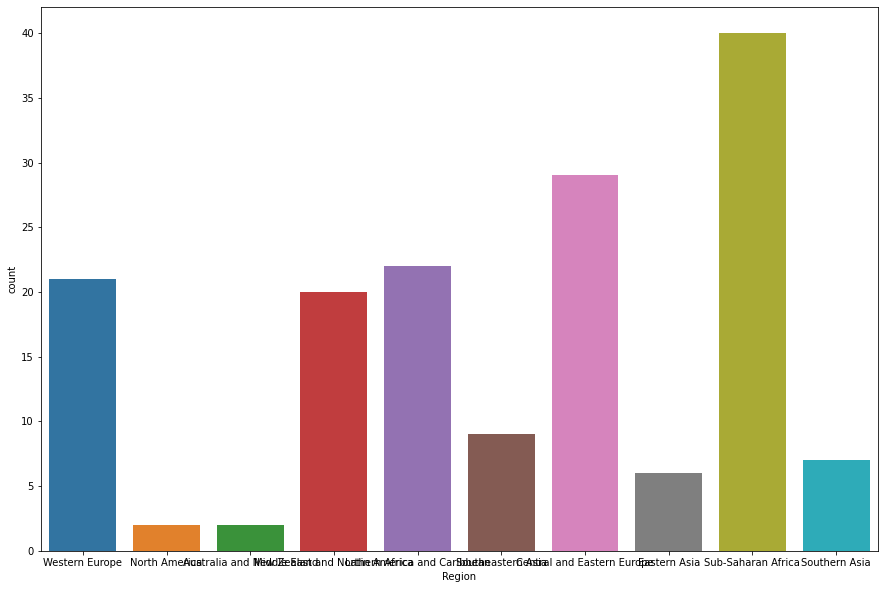

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(c_data)
plt.show()

In [14]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [15]:
data

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
n_data = data.drop(columns=['Region','Happiness Score'])
n_data.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<function matplotlib.pyplot.show(close=None, block=None)>

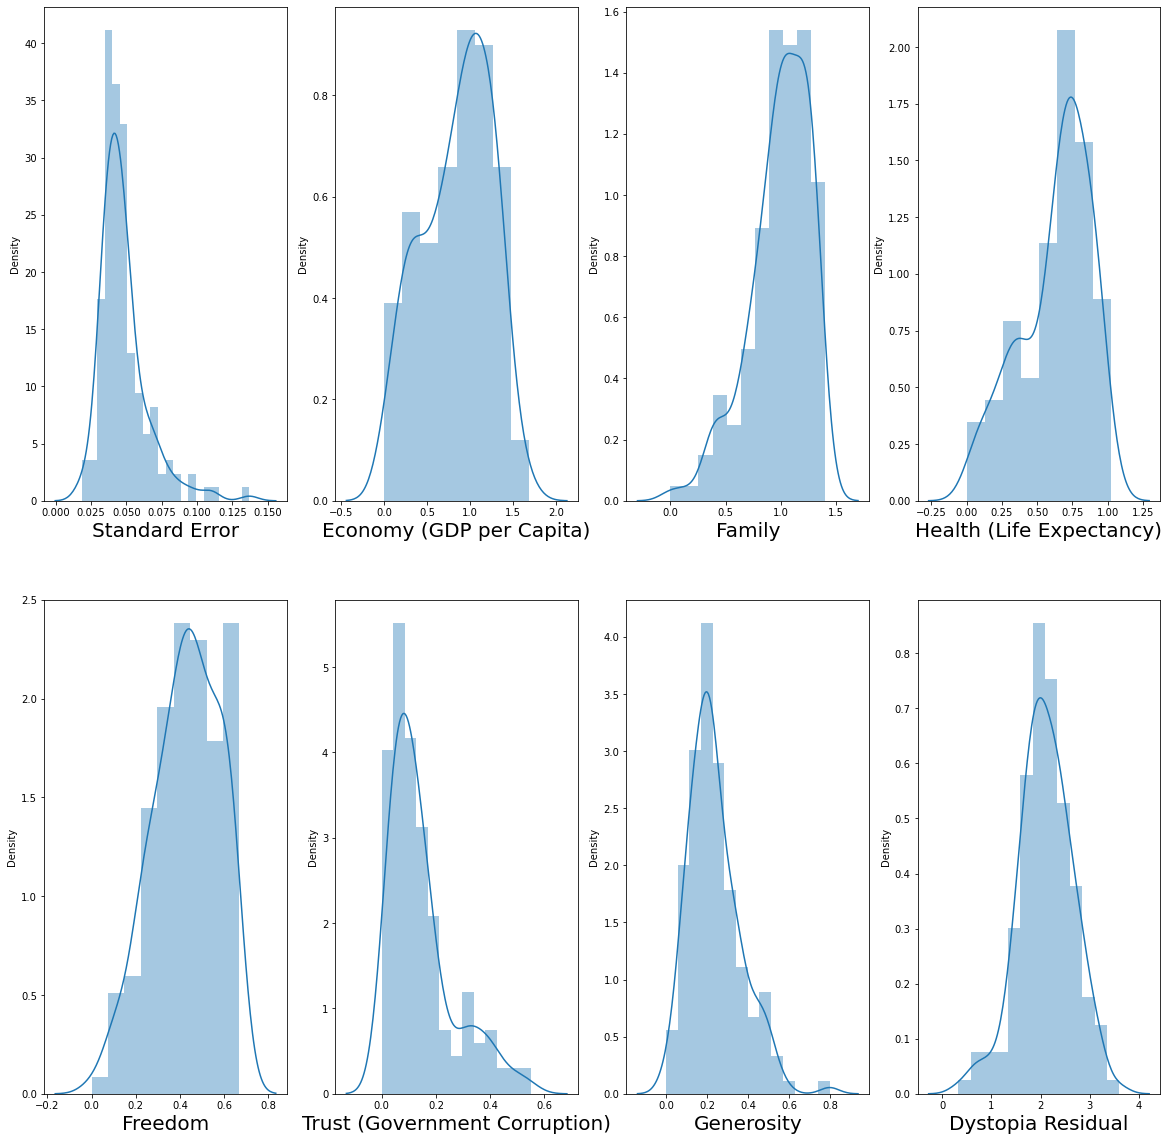

In [17]:
plt.figure(figsize=(20,20))
plotnumber = 1
for column in n_data:
    if plotnumber <=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [18]:
# check skewness:
n_data.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [19]:
# we observe skewness in a few features impling the presence of outliers


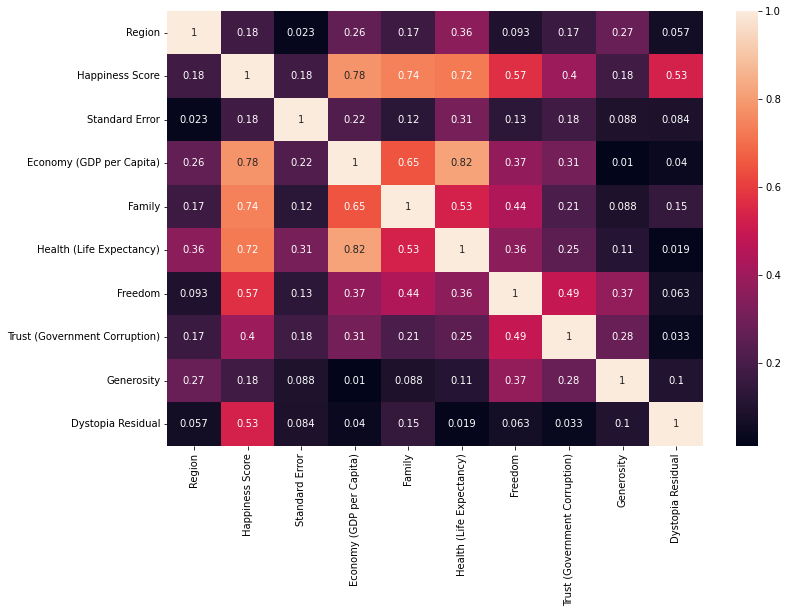

In [20]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [21]:
# Health and economy seem to have a strong realtion lets check if there is multicollinearity between them usin VIF

In [22]:
#Dividing data into features and label

X = data.drop(columns=['Happiness Score'])
Y= data['Happiness Score']

In [23]:
# Using Power Transform to Sclae the data and also treat outliers
scaler = PowerTransformer(method = 'yeo-johnson')

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.244530,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,1.244530,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,1.244530,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,1.244530,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,0.030337,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...
153,0.955102,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,0.955102,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,-0.303010,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,0.955102,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [24]:
X_scaled.skew()

Region                          -0.228041
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [25]:
# Skewness is less tha +/_ 0.5 for all features
# Now lets split the data

In [26]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.30, random_state = 12)

In [34]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)
    
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [35]:
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9925024677310611
Accuracy of testing model : 0.9928846280598599
RMSE :  0.09468847834068754

-----------------------------------------



In [37]:
# Cross validation
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy= r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range (2,10):
    cv_score=cross_val_score(lr,X_scaled,Y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv_score is {cv_mean}, training accuracy is {Train_accuracy} and testing accuracy is {Test_accuracy}")
    print ("\n")

At cross fold 2 the cv_score is 0.8442788211737084, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 3 the cv_score is 0.8787421103861454, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 4 the cv_score is 0.8336361169912866, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 5 the cv_score is 0.7974110124530821, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 6 the cv_score is 0.6973952457196334, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 7 the cv_score is 0.6046622716048581, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 8 the cv_score is 0.5666241723059103, training accuracy is 0.9925024677310611 and testing accuracy is 0.9928846280598599


At cross fold 9 the cv_score is 0.4036637

In [38]:
# As there not much difference we select CV as 5

<function matplotlib.pyplot.show(close=None, block=None)>

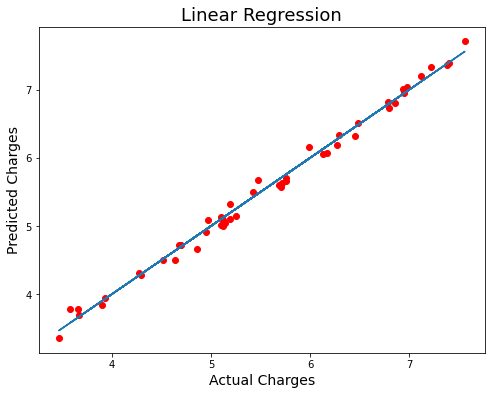

In [40]:
# Linear regression Graph:
plt.figure (figsize=(8,6))
plt.scatter(x=y_test,y=pred_test, color = 'r')
plt.plot(y_test,y_test)
plt.xlabel("Actual Charges", fontsize =14)
plt.ylabel("Predicted Charges", fontsize=14)
plt.title ("Linear Regression", fontsize = 18)
plt.show

In [41]:
#Regularisation
from sklearn.linear_model import Lasso

#Hyperparameter Tuining

parameters = {'alpha':[0.001, 0.01, 0.1,1,10],
             'random_state':list (range(0,10))}
ls = Lasso()
clf = RandomizedSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'random_state': 8, 'alpha': 0.001}


In [42]:
# Lasso Training
ls= Lasso(alpha=0.001, random_state=8)
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9925024677310611
Accuracy of testing model : 0.9928846280598599
RMSE :  0.09468847834068754

-----------------------------------------



In [43]:
#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.7373272586546464
RMSE :  0.5753151853549495

-----------------------------------------



In [45]:
# Hyperparameter Tuning :

parameters = {'max_features':['auto','sqrt','log2'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = RandomizedSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 11}


In [47]:
dt1 = DecisionTreeRegressor(max_depth =11, min_samples_leaf = 3, min_samples_split = 3, max_features="auto")
model_selection(dt1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9691525789604267
Accuracy of testing model : 0.7086895616390594
RMSE :  0.6058656874575634

-----------------------------------------



In [49]:
#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9820174941943939
Accuracy of testing model : 0.8600957921231519
RMSE :  0.41986891466017967

-----------------------------------------



In [50]:
# Hyperparameter Tuning:
parameters = {'n_estimators':range(25,30),
    'max_features':['auto','sqrt','log2'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'n_estimators': 25, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 9}


In [51]:
rf1= RandomForestRegressor(n_estimators=25,max_features='log2', max_depth = 9, min_samples_leaf = 3, min_samples_split = 3)
model_selection(rf1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9500163127654699
Accuracy of testing model : 0.8309201594376984
RMSE :  0.4615770942664031

-----------------------------------------



In [52]:
#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9847718954791538
Accuracy of testing model : 0.9287356205606111
RMSE :  0.29966401075157767

-----------------------------------------



In [54]:
# Hyperparameter Tuning :

parameters = {'kernel':['linear','rbf','sigmoid'],
    'gamma': ['scale','auto']
    }

clf = RandomizedSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'kernel': 'linear', 'gamma': 'scale'}


In [55]:
svr1 = SVR(kernel='linear',gamma='scale')
model_selection(svr1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9920173911112304
Accuracy of testing model : 0.9932770246292398
RMSE :  0.09204052646886668

-----------------------------------------



In [56]:
#Since Accuracy is high and RMSE is lower for both svr1 and linear regrssion we can choose any one 
# I am going to use SVR

In [57]:
# Saving Model
import pickle
filename= 'W_Happiness_Score.pkl'
pickle.dump(svr1,open(filename, 'wb'))

In [58]:
a= np.array(y_test)
predicted=np.array (svr1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,5.102,5.088623
1,4.512,4.470003
2,5.987,6.185778
3,3.931,3.970147
4,6.485,6.521930
5,6.798,6.747683
6,3.465,3.364117
7,3.896,3.846033
8,5.098,5.136034
9,4.677,4.686245
